Symulacja populacji dorosłych osób i analiza:

- BMI
- Stylu życia
- czynników ryzyka zdrowotnego

In [1]:
import numpy as np

N = 2000

# Dane:
np.random.seed(42)

wiek = np.random.uniform(18, 80, size = N)

wzrost = np.random.normal(170, 10, size = N) 

waga = np.random.normal(75, 15, size = N)

aktywnosc = np.random.choice(["niska", "średnia", "wysoka"], size = N)

palenie = np.random.choice(["tak", "nie"], size = N, p=[0.25, 0.75])

In [2]:
# ETAP 2 - Obliczenie NumPy (Maski)

BMI = (waga / (wzrost/100)**2)

# Nadwaga bmi >= 25
nadwaga = (BMI >= 25)
print(f"Nadwaga: \n{nadwaga}")

# Otyłość gdzie BMI >= 30
otylosc = (BMI >= 30)
print(f"\nOtyłość: \n{otylosc}")

# Niska aktywność
niska_aktywnosc = aktywnosc == "niska"
print(f"\nNiska aktywność: \n{niska_aktywnosc}")

# palacze 
palacze = palenie == "tak"
print(f"\nPalacze: \n{palacze}")



Nadwaga: 
[ True  True False ...  True False  True]

Otyłość: 
[ True  True False ...  True False  True]

Niska aktywność: 
[False False  True ...  True  True False]

Palacze: 
[False False False ... False False False]


In [3]:
# ETAP 3 - ANALIZA

print("==== ANALIZA ===")
# Średnie BMI populacji
avg_BMI = BMI.mean()
print(f"\nŚrednie BMI populacji wynosi: {avg_BMI:.2f}")

# % osób z nadwagą 
nadwaga_procent = (np.sum(nadwaga) / N) * 100
print(f"\nProcent osób z nadwagą wynosi {nadwaga_procent}%")

# % osób z otyłością
otylosc_procent = (np.sum(otylosc) / N) * 100
print(f"Procent osób z otyłością wynosi {otylosc_procent:.2f}%")

# BMI vs aktywność
bmi_wysoka_akt = BMI[aktywnosc == "wysoka"].mean()
bmi_niska_akt = BMI[aktywnosc == "niska"].mean()

print(f"\nŚrednie BMI dla osób z wysoką aktywnością wynosi {bmi_wysoka_akt:.2f}")
print(f"Średnie BMI dla osób z niską aktywnością wynosi {bmi_niska_akt:.2f}")

# palacze vs niepalący
bmi_palacze = BMI[palacze].mean()
bmi_niepalacy = BMI[palenie == "nie"].mean()

print(f"\nŚrednie BMI osób palących wynosi {bmi_palacze:.2f}")
print(f"Średnie BMI osób niepalących wynosi {bmi_niepalacy:.2f}")

==== ANALIZA ===

Średnie BMI populacji wynosi: 26.01

Procent osób z nadwagą wynosi 54.65%
Procent osób z otyłością wynosi 24.15%

Średnie BMI dla osób z wysoką aktywnością wynosi 25.97
Średnie BMI dla osób z niską aktywnością wynosi 25.99

Średnie BMI osób palących wynosi 25.53
Średnie BMI osób niepalących wynosi 26.15


In [4]:
# ETAP 4 - GRUPA RYZYKA

# Definicja (logiczna maska): Osoba jest w grupie ryzyka jeśli:
print("=== GRUPA RYZYKA ===")

# 1. BMI >= 30 (Otyłość)
# 2. BMI >= 25 i niska aktywność
# 3. BMI >= 25 i palenie

maska_ryzyka = (BMI >= 30) | \
			   ((BMI >= 25) & (aktywnosc == "niska")) | \
			   ((BMI >= 25) & (palenie == "tak"))

grupa_ryzyka = BMI[maska_ryzyka]
liczba_osob_ryzyka = np.sum(maska_ryzyka)
procent_ryzyka = (liczba_osob_ryzyka / N) * 100

print(f"\nLiczba osób w grupe ryzyka: {liczba_osob_ryzyka}")
print(f"\nProcent osób znajdujących się w grupie ryzyka: {procent_ryzyka:.2f}%")

# Kto jest w tej grupie? Średni wiek:
sredni_wiek_ryzyka = wiek[maska_ryzyka].mean()
sredni_wiek_bezpiecznej_grupy = wiek[~maska_ryzyka].mean() # Tilda ~ oznacza "wszyscy poza maską"

print(f"\nŚredni wiek osób z grupy ryzyka: {sredni_wiek_ryzyka:.2f} lat.")
print(f"Średni wiek osób poza grupą ryzyka: {sredni_wiek_bezpiecznej_grupy:.2f} lat.")

=== GRUPA RYZYKA ===

Liczba osób w grupe ryzyka: 795

Procent osób znajdujących się w grupie ryzyka: 39.75%

Średni wiek osób z grupy ryzyka: 48.37 lat.
Średni wiek osób poza grupą ryzyka: 49.28 lat.


In [5]:
# ETAP 5 - Symulacja poprawy

# Scenariusz: 
# - osoby z grupy ryzyka:
#	- +1 poziom aktywności
#	- -5% masy ciała

# -> przelicz BMI ponownie
# -> porównaj przed vs po

# 1. Kopiujemy dane, aby zachować oryginały do porównania
waga_po = waga.copy()
aktywnosc_po = aktywnosc.copy()

# 2. Obniżamy 5% masy ciała tylko osobom z grupy ryzyka:
waga_po[maska_ryzyka] = waga_po[maska_ryzyka] * 0.95

# 3. Zwiększamy aktywność
# najpierw średnia na wysoka
aktywnosc_po[(maska_ryzyka) & (aktywnosc == "średnia")] = "wysoka"

# teraz niska na średnia
aktywnosc_po[(maska_ryzyka) & (aktywnosc == "niska")] = "średnia"

# 4. Przeliczamy nowe BMI
BMI_po = waga_po / (wzrost / 100)**2

# 5. Sprawdzamy, ile osób wypadło z otyłości (BMI < 30)
otylosc_przed = np.sum(BMI >= 30)
otylosc_po = np.sum(BMI_po >= 30)

nadwaga_przed = np.sum(BMI >= 25)
nadwaga_po = np.sum(BMI >= 25)

print("\t===== WYNIKI SYMULACJI POPRAWY =====")
print(f"\nLiczba osób z otyłością przed zmianami: {otylosc_przed}")
print(f"Liczba osób z otyłością po zmianach: {otylosc_po}")
print(f"Udało się 'uzdrowić' {otylosc_przed - otylosc_po} osób!")

# Średni spadek BMI w grupie ryzyka
spadek_BMI = BMI[maska_ryzyka].mean() - BMI_po[maska_ryzyka].mean()
print(f"\nŚredni spadek BMI w grupie ryzyka: {spadek_BMI:.2f}")

	===== WYNIKI SYMULACJI POPRAWY =====

Liczba osób z otyłością przed zmianami: 483
Liczba osób z otyłością po zmianach: 349
Udało się 'uzdrowić' 134 osób!

Średni spadek BMI w grupie ryzyka: 1.57


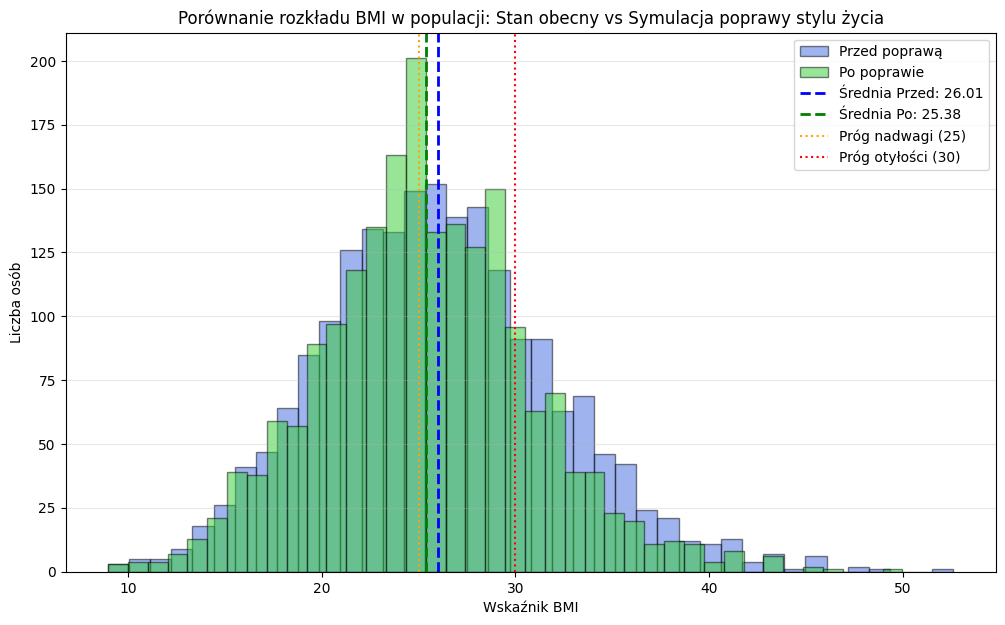

In [6]:
# ETAP 6 - Wizualizacja

# - Histogram BMI 
# przed vs po (średnie)

import matplotlib.pyplot as plt

# Tworzymy wykres
plt.figure(figsize=(12, 7))

# Histogram BMI PRZED (półprzezroczysty niebieski)
plt.hist(BMI, bins=40, alpha=0.5, color='royalblue', label='Przed poprawą', edgecolor='black')

# Histogram BMI PO (półprzezroczysty zielony)
plt.hist(BMI_po, bins=40, alpha=0.5, color='limegreen', label='Po poprawie', edgecolor='black')

# Dodajemy linie średnich
plt.axvline(BMI.mean(), color='blue', linestyle='dashed', linewidth=2, label=f'Średnia Przed: {BMI.mean():.2f}')
plt.axvline(BMI_po.mean(), color='green', linestyle='dashed', linewidth=2, label=f'Średnia Po: {BMI_po.mean():.2f}')

# Dodajemy progi medyczne
plt.axvline(25, color='orange', linestyle=':', label='Próg nadwagi (25)')
plt.axvline(30, color='red', linestyle=':', label='Próg otyłości (30)')

# Opisy
plt.title('Porównanie rozkładu BMI w populacji: Stan obecny vs Symulacja poprawy stylu życia')
plt.xlabel('Wskaźnik BMI')
plt.ylabel('Liczba osób')
plt.legend()
plt.grid(axis='y', alpha=0.3)

plt.show()
